# ME5413 Homework 3: Planning

## Task 0: Load the Map

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from time import time

from graph_based_planner import GraphBasedPlanner

%matplotlib inline

Size of the map: (1000, 1000)
Occupied Cells: 823039
Free Cells: 176961


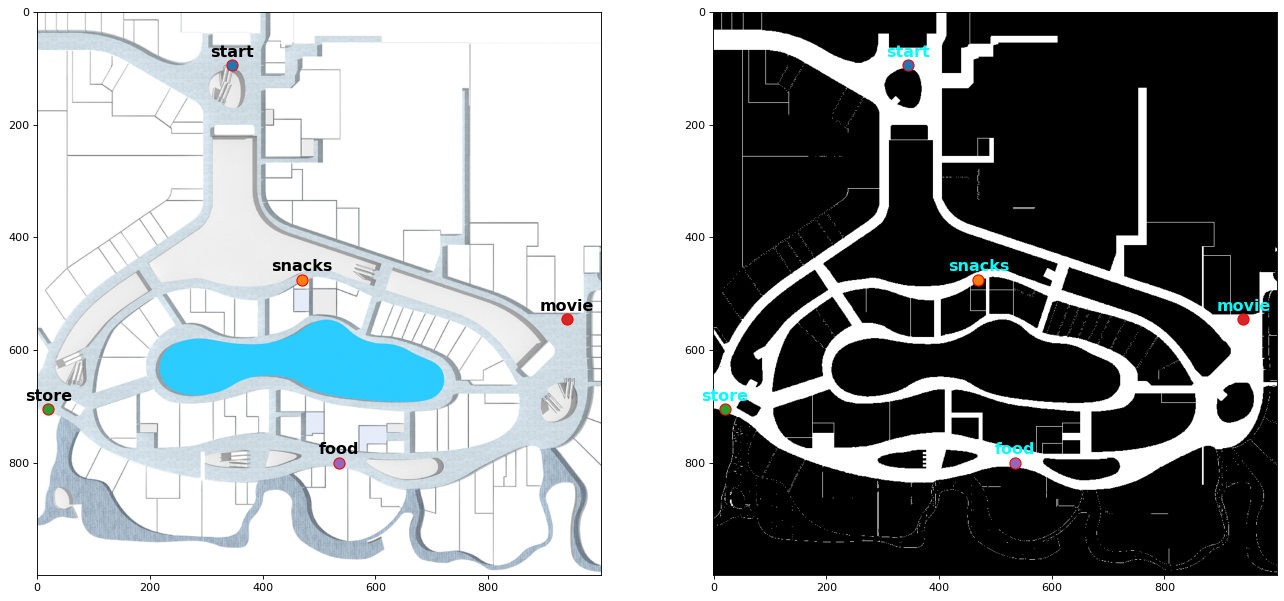

Cell start is free: True
Cell snacks is free: True
Cell store is free: True
Cell movie is free: True
Cell food is free: True


In [14]:
# Load the map
floor_plan = cv2.imread('./map/vivocity.png')
grid_map_img = cv2.imread('./map/vivocity_freespace.png', cv2.IMREAD_GRAYSCALE)
grid_map = grid_map_img.transpose()
print("Size of the map:", grid_map.shape)
print("Occupied Cells:", np.count_nonzero(grid_map == 0))
print("Free Cells:", np.count_nonzero(grid_map == 255))

# Map resolution (Constant)
MAP_RES = 0.2 # each cell represents a 0.2m x 0.2m square in reality

# agent radius which in this case is the human footprint
AGENT_RADIUS = 0.3

# Locations on the map
locations = {'start':  [345, 95],    # Start from the level 2 Escalator
             'snacks': [470, 475],   # Garrett Popcorn
             'store':  [20, 705],    # DJI Store
             'movie':  [940, 545],   # Golden Village
             'food':   [535, 800],   # PUTIEN
            }

# A helper function to mark the locations on the map
def plot_locations(locations: dict, color: 'str'='black'):
    for key, value in locations.items():
        plt.plot(locations[key][0], locations[key][1], marker="o", markersize=10, markeredgecolor="red")
        plt.text(locations[key][0], locations[key][1]-15, s=key, fontsize='x-large', fontweight='bold', c=color, ha='center')
    return

# Plot the locaitons on the map 
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1,2,1)
plt.imshow(floor_plan)
plot_locations(locations)
plt.subplot(1,2,2)
plt.imshow(grid_map_img, cmap='gray')
plot_locations(locations, color='cyan')
plt.show()

# Check if the designated locations are free
for key, value in locations.items():
    print(f"Cell {key} is free: {grid_map[value[0], value[1]] == 255}")

## Task 1

In [15]:
def plot_path(path, colour, legend):
    plt.imshow(grid_map_img, cmap='gray')
    plot_locations(locations, color='cyan')
    x, y = zip(*path)
    plt.plot(x, y, linewidth=2.0, color=colour, label=legend)


def runner(planner):
    path_colours = ('red', 'blue', 'green', 'yellow', 'violet')
    for start_loc_name, start_pos in locations.items():
        plt.figure(figsize=(10, 10))
        for i, (dest_loc_name, dest_pos) in enumerate(locations.items()):
            if start_loc_name != dest_loc_name:
                print(f'Finding path from {start_loc_name} to {dest_loc_name}...')
                start_time = time()
                result = planner.plan(start_pos, dest_pos)
                time_cost = time() - start_time
                if result is not None:
                    path, distance, visited_grids = result
                    print(f'Found path with total distance {distance:.2f}m in {time_cost:.2f}s, visited {len(visited_grids)} grids.')
                    plot_path(path, path_colours[i], f'{start_loc_name} to {dest_loc_name} (distance={distance:.2f}m)')

        plt.legend()
        plt.show()


Running A* planner...
Finding path from start to snacks...
Found path with total distance 143.40m in 5.78s, visited 35539 grids.
Finding path from start to store...
Found path with total distance 155.37m in 7.79s, visited 28591 grids.
Finding path from start to movie...
Found path with total distance 179.12m in 5.11s, visited 30704 grids.
Finding path from start to food...
Found path with total distance 224.36m in 14.53s, visited 76302 grids.


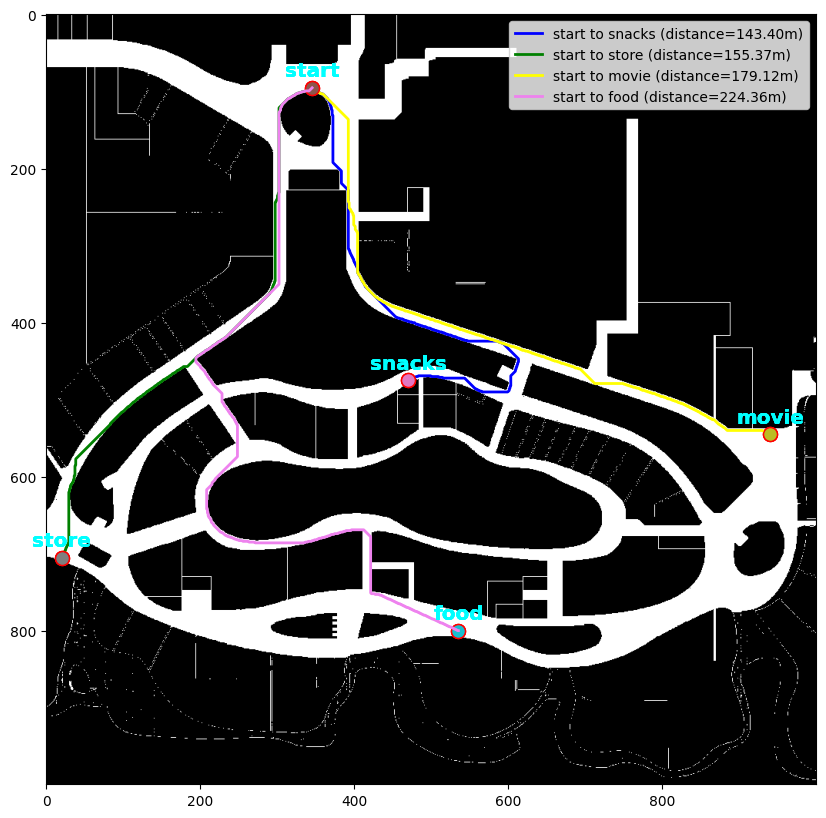

Finding path from snacks to start...
Found path with total distance 143.40m in 3.84s, visited 25088 grids.
Finding path from snacks to store...
Found path with total distance 115.19m in 2.61s, visited 14573 grids.
Finding path from snacks to movie...
Found path with total distance 107.91m in 1.01s, visited 11441 grids.
Finding path from snacks to food...
Found path with total distance 134.41m in 3.88s, visited 25723 grids.


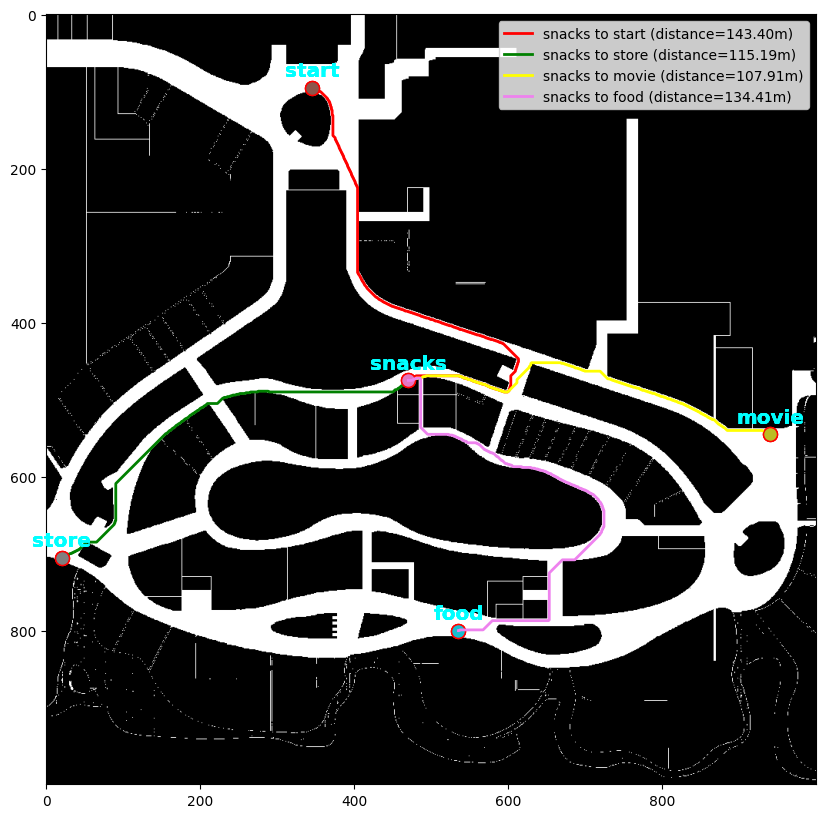

Finding path from store to start...
Found path with total distance 155.37m in 4.57s, visited 25041 grids.
Finding path from store to snacks...
Found path with total distance 115.19m in 4.48s, visited 23279 grids.
Finding path from store to movie...
Found path with total distance 209.98m in 12.07s, visited 63769 grids.
Finding path from store to food...
Found path with total distance 111.04m in 1.87s, visited 16476 grids.


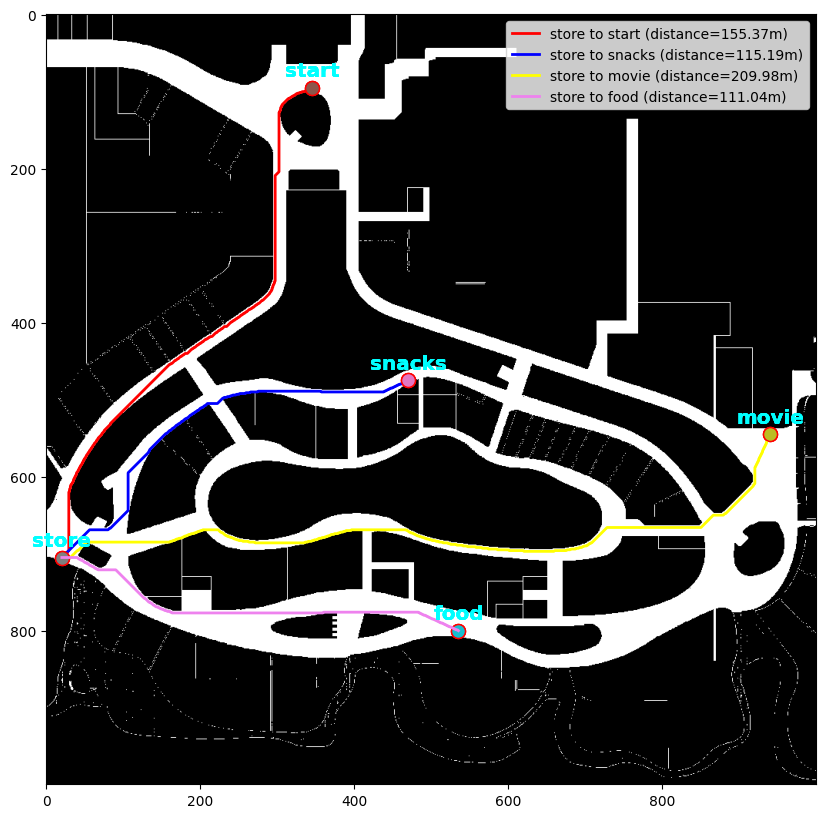

Finding path from movie to start...
Found path with total distance 179.12m in 4.48s, visited 24175 grids.
Finding path from movie to snacks...
Found path with total distance 107.91m in 1.26s, visited 11137 grids.
Finding path from movie to store...
Found path with total distance 209.98m in 7.27s, visited 39477 grids.
Finding path from movie to food...
Found path with total distance 113.96m in 5.90s, visited 26505 grids.


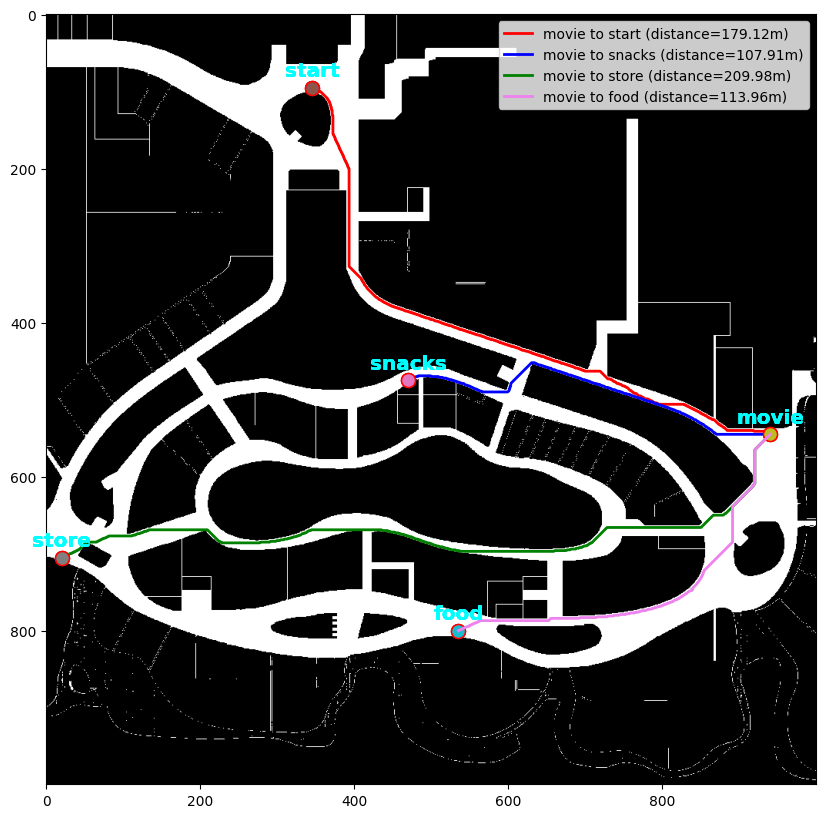

Finding path from food to start...
Found path with total distance 224.36m in 12.79s, visited 66101 grids.
Finding path from food to snacks...
Found path with total distance 134.41m in 5.25s, visited 34278 grids.
Finding path from food to store...
Found path with total distance 111.04m in 2.90s, visited 20854 grids.
Finding path from food to movie...
Found path with total distance 113.96m in 6.02s, visited 25474 grids.


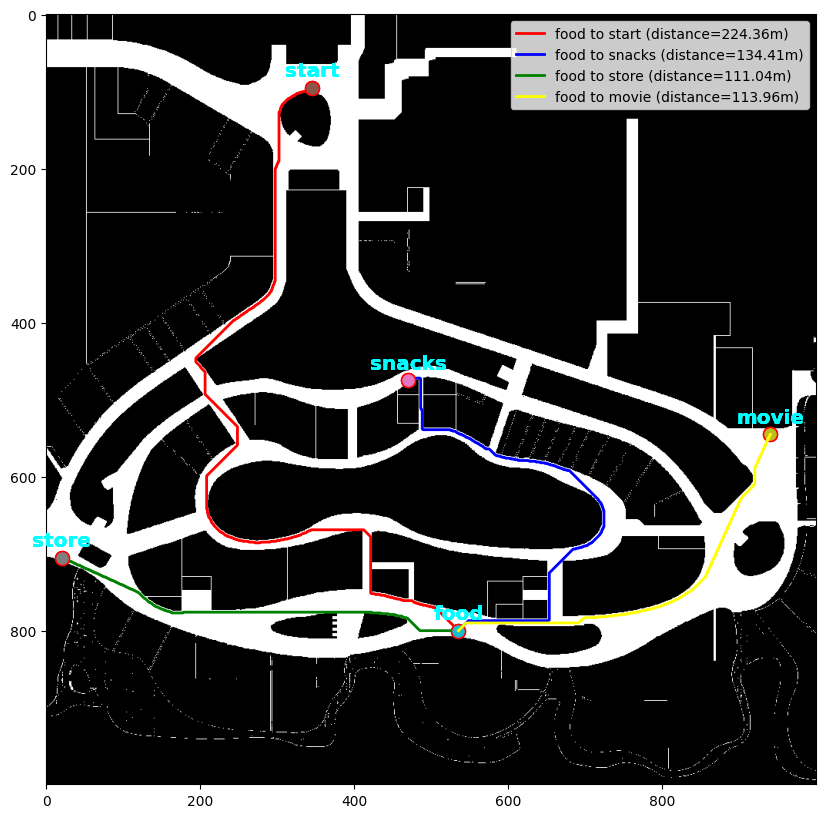

In [16]:
# A* planner

euclidean = lambda curr_pos, goal: MAP_RES * np.linalg.norm(np.array(curr_pos) - np.array(goal))    # heuristic function
astar_planner = GraphBasedPlanner(grid_map_img, MAP_RES, AGENT_RADIUS, search_method='a*', heuristic_func=euclidean)

print('Running A* planner...')
runner(astar_planner)



Running Dijkstra planner...
Finding path from start to snacks...
Found path with total distance 143.40m in 3.24s, visited 67292 grids.
Finding path from start to store...
Found path with total distance 155.37m in 3.86s, visited 78898 grids.
Finding path from start to movie...
Found path with total distance 179.12m in 4.44s, visited 93521 grids.
Finding path from start to food...
Found path with total distance 224.36m in 6.50s, visited 141822 grids.


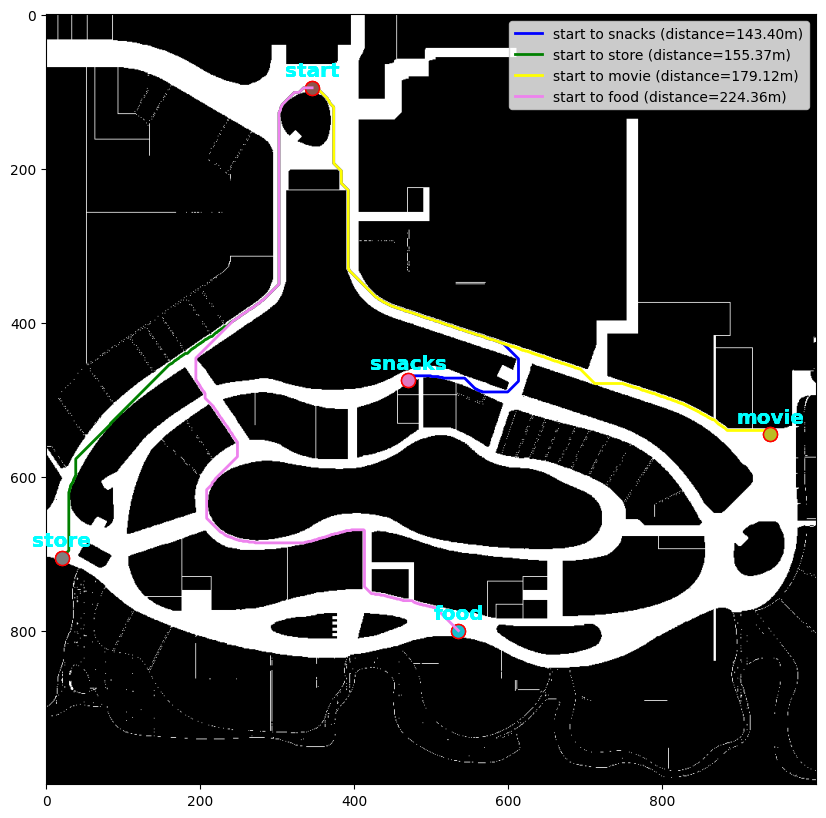

Finding path from snacks to start...
Found path with total distance 143.40m in 7.22s, visited 117205 grids.
Finding path from snacks to store...
Found path with total distance 115.19m in 3.21s, visited 75550 grids.
Finding path from snacks to movie...
Found path with total distance 107.91m in 2.46s, visited 61654 grids.
Finding path from snacks to food...
Found path with total distance 134.41m in 5.90s, visited 105594 grids.


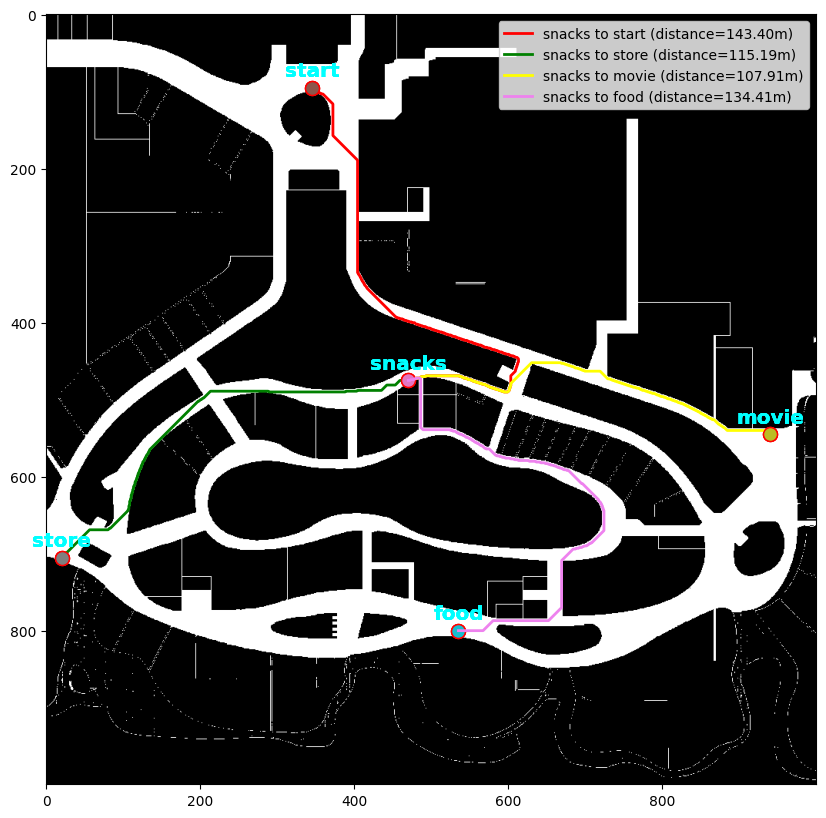

Finding path from store to start...
Found path with total distance 155.37m in 3.97s, visited 86887 grids.
Finding path from store to snacks...
Found path with total distance 115.19m in 2.36s, visited 55751 grids.
Finding path from store to movie...
Found path with total distance 209.98m in 6.28s, visited 140472 grids.
Finding path from store to food...
Found path with total distance 111.04m in 2.15s, visited 54221 grids.


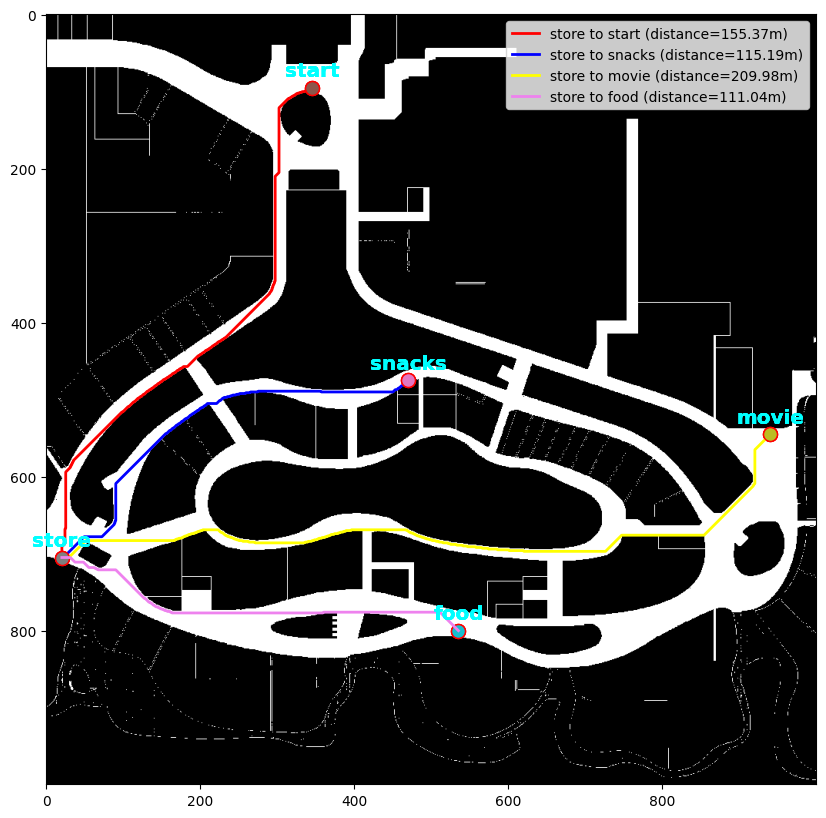

Finding path from movie to start...
Found path with total distance 179.12m in 5.54s, visited 106130 grids.
Finding path from movie to snacks...
Found path with total distance 107.91m in 2.23s, visited 54237 grids.
Finding path from movie to store...
Found path with total distance 209.98m in 6.70s, visited 136800 grids.
Finding path from movie to food...
Found path with total distance 113.96m in 2.45s, visited 56848 grids.


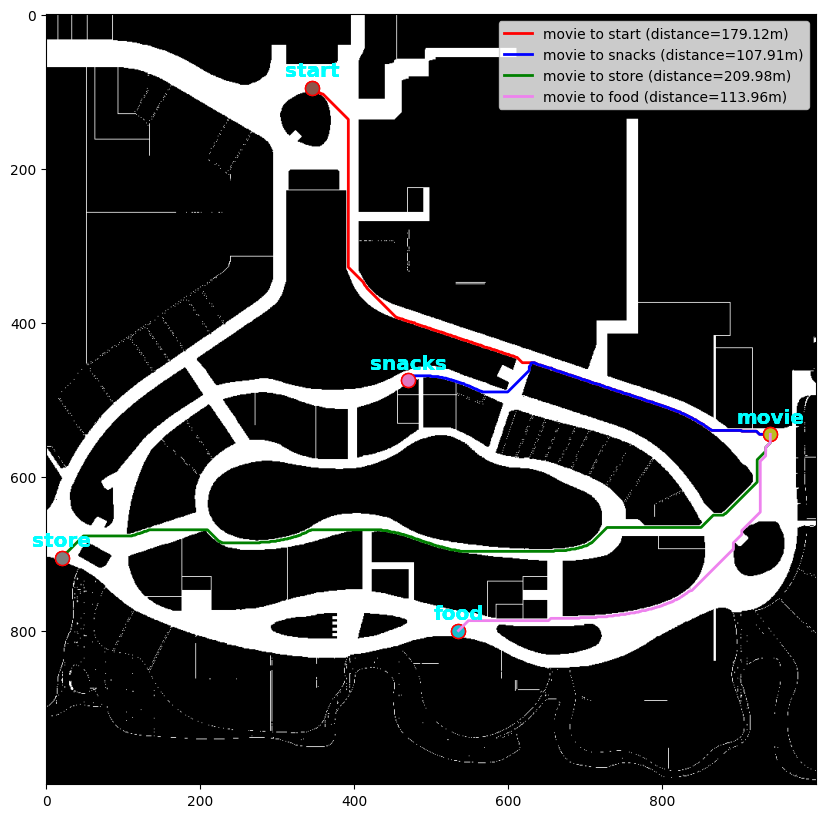

Finding path from food to start...
Found path with total distance 224.36m in 5.59s, visited 129198 grids.
Finding path from food to snacks...
Found path with total distance 134.41m in 4.09s, visited 92582 grids.
Finding path from food to store...
Found path with total distance 111.04m in 2.86s, visited 70653 grids.
Finding path from food to movie...
Found path with total distance 113.96m in 3.14s, visited 74347 grids.


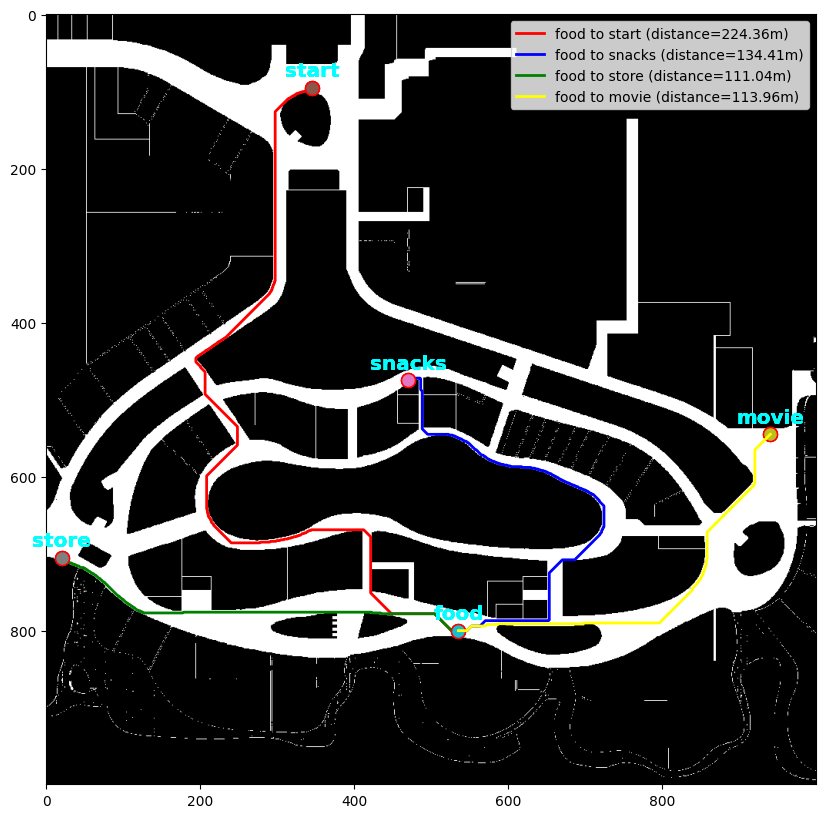

In [17]:
# Dijkstra planner
dijkstra_planner = GraphBasedPlanner(grid_map_img, MAP_RES, AGENT_RADIUS, search_method='dijkstra')

print('Running Dijkstra planner...')
runner(dijkstra_planner)


Running greedy best-first search planner...
Finding path from start to snacks...
Found path with total distance 146.38m in 0.36s, visited 4174 grids.
Finding path from start to store...
Found path with total distance 165.09m in 0.08s, visited 743 grids.
Finding path from start to movie...
Found path with total distance 182.95m in 0.16s, visited 1768 grids.
Finding path from start to food...
Found path with total distance 240.31m in 0.33s, visited 3705 grids.


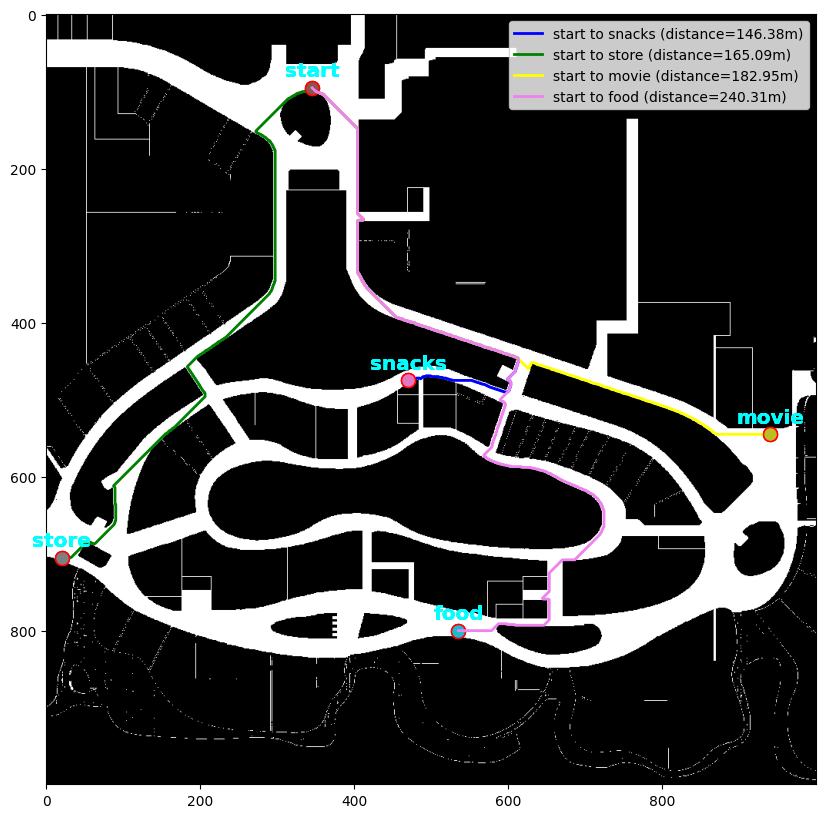

Finding path from snacks to start...
Found path with total distance 161.58m in 0.35s, visited 4265 grids.
Finding path from snacks to store...
Found path with total distance 124.17m in 0.05s, visited 541 grids.
Finding path from snacks to movie...
Found path with total distance 143.86m in 0.08s, visited 852 grids.
Finding path from snacks to food...
Found path with total distance 171.77m in 0.32s, visited 3386 grids.


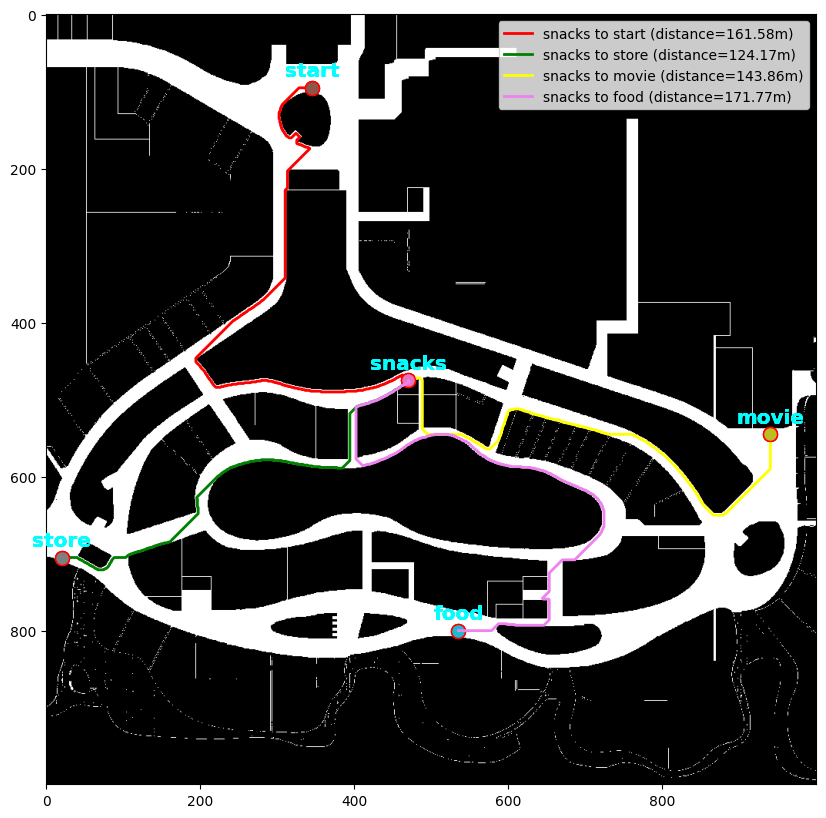

Finding path from store to start...
Found path with total distance 174.57m in 0.09s, visited 846 grids.
Finding path from store to snacks...
Found path with total distance 121.17m in 0.05s, visited 537 grids.
Finding path from store to movie...
Found path with total distance 256.82m in 0.14s, visited 1374 grids.
Finding path from store to food...
Found path with total distance 118.87m in 0.05s, visited 534 grids.


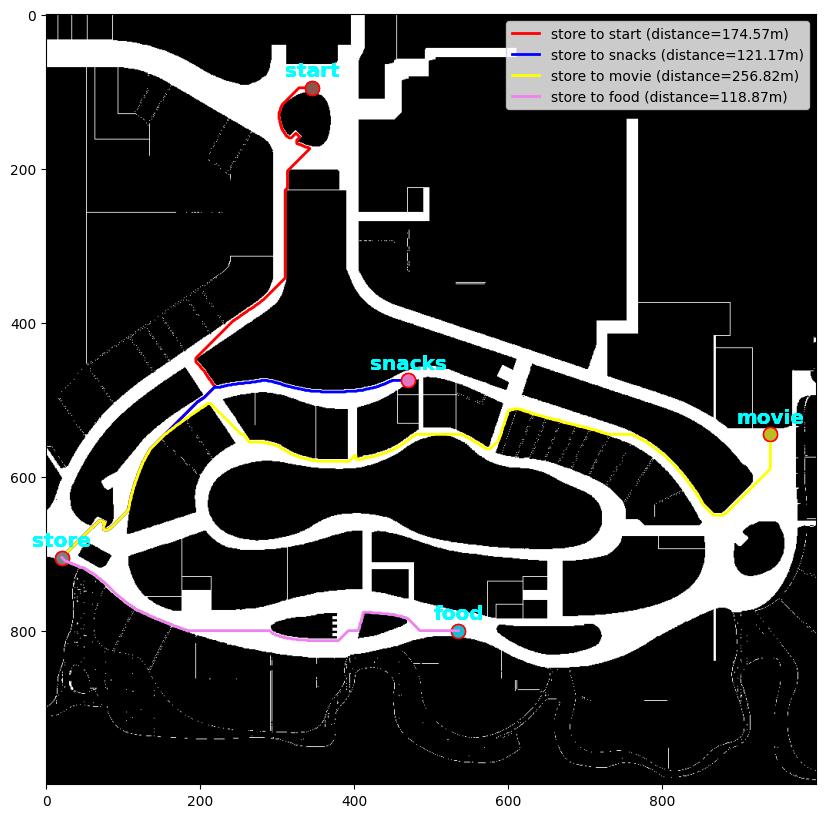

Finding path from movie to start...
Found path with total distance 195.72m in 0.45s, visited 4999 grids.
Finding path from movie to snacks...
Found path with total distance 108.71m in 0.07s, visited 651 grids.
Finding path from movie to store...
Found path with total distance 240.22m in 0.11s, visited 1021 grids.
Finding path from movie to food...
Found path with total distance 208.16m in 0.24s, visited 2876 grids.


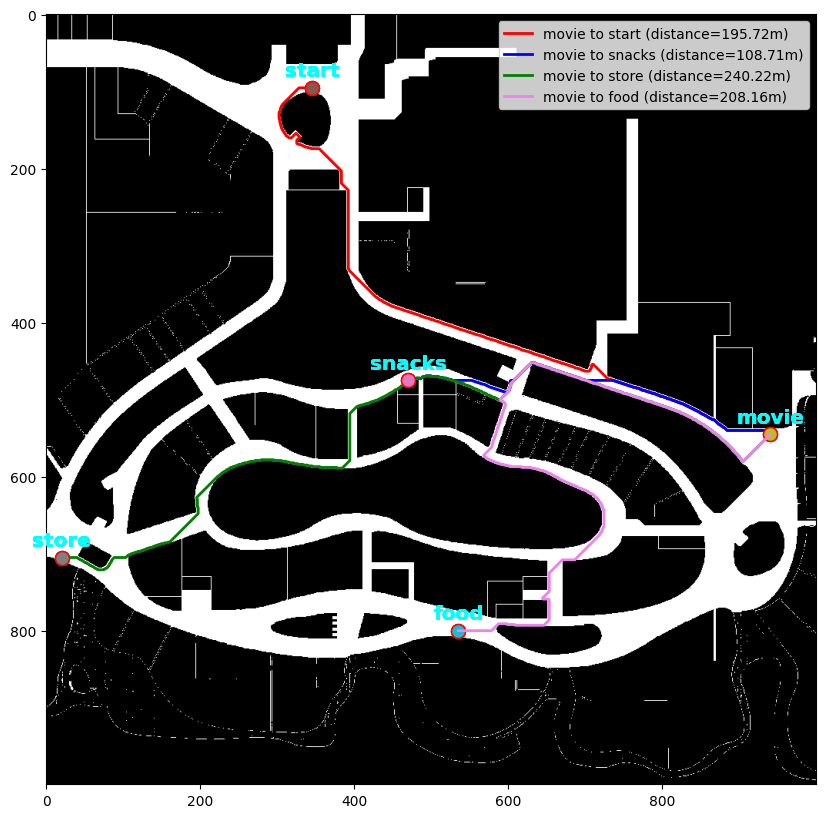

Finding path from food to start...
Found path with total distance 249.05m in 0.70s, visited 7744 grids.
Finding path from food to snacks...
Found path with total distance 182.67m in 0.93s, visited 11936 grids.
Finding path from food to store...
Found path with total distance 132.88m in 0.06s, visited 672 grids.
Finding path from food to movie...
Found path with total distance 120.75m in 0.07s, visited 700 grids.


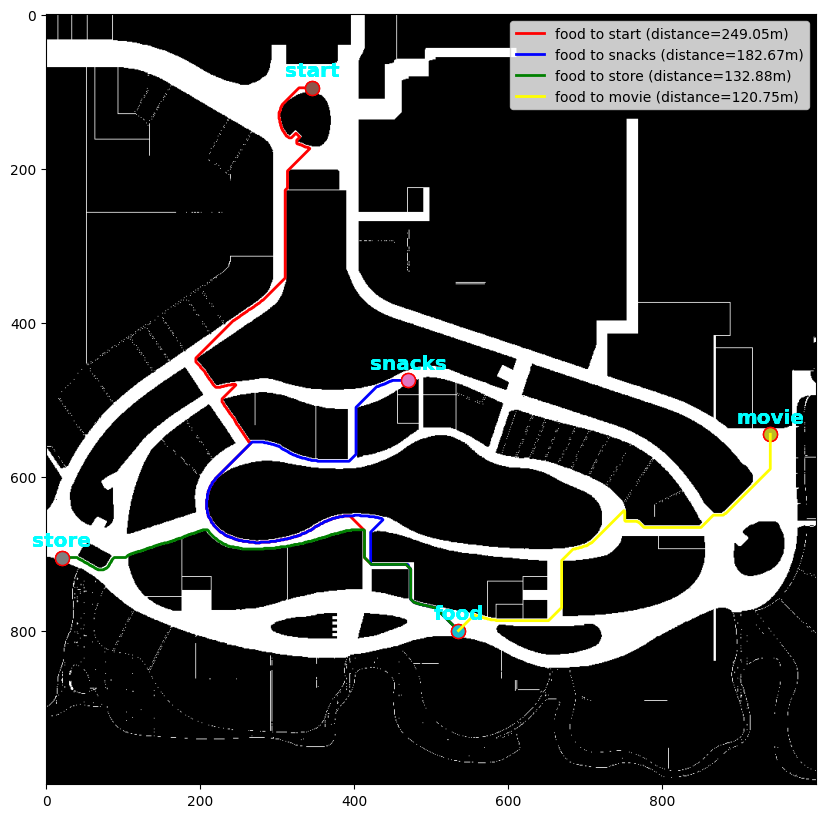

In [18]:
# Greedy best-first search planner

euclidean = lambda curr_pos, goal: MAP_RES * np.linalg.norm(np.array(curr_pos) - np.array(goal))    # heuristic function
gbfs_planner = GraphBasedPlanner(grid_map_img, MAP_RES, AGENT_RADIUS, search_method='gbfs', heuristic_func=euclidean)

print('Running greedy best-first search planner...')
runner(gbfs_planner)


## Task 2